In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase
using Random

using GraphIO 
using ParserCombinator 

rng = Random.default_rng();

# graph parameters
n = 100
p = 0.9
eta = 0.001

# planted ranking score
planted_score = randperm(rng,n);

# utility
function common_edges(g,noisy_edges)
    common = []
    for l = 1:length(noisy_edges)
        edge = noisy_edges[l]
        s = edge[1]
        d = edge[2]
        if  has_edge(g, s, d) || has_edge(g, d, s)
            push!(common,edge)
        end
    end
    return common
end

common_edges (generic function with 1 method)

In [3]:
n_rep = 100

nb_noisy_crsf = zeros(n_rep,1)
nb_noisy_st = zeros(n_rep,1)

meta_g, noisy_edges,err_edges = ero_located(rng, n, p, eta;planted_score)


for i = 1:n_rep
    q = 0
    crsf = multi_type_spanning_forest(rng, meta_g, q;)
    absorbing_node = true
    ust = true
    st = multi_type_spanning_forest(rng, meta_g, q; absorbing_node, ust)
    #
    common_crsf = common_edges(crsf,noisy_edges)
    nb_noisy_crsf[i] = length(common_crsf)
    common_st = common_edges(st,noisy_edges)
    nb_noisy_st[i] = length(common_st)

end

println("crsf ") 
println("mean ", mean(nb_noisy_crsf), " std " ,std(nb_noisy_crsf))
println("st")
println("mean ",  mean(nb_noisy_st), " std " ,std(nb_noisy_st))


crsf 


mean 1.29

 std 0.5373898759633259
st
mean 0.4 std 0.6816498108607268


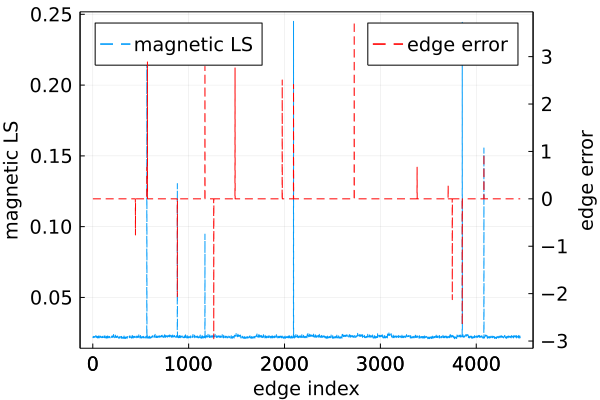

In [22]:
# identify id of errored edges before plot
errored_edges = zeros(ne(meta_g),1)
it = 0
for e in edges(meta_g)
    it +=1

    iter = 0
    for ne in noisy_edges
        iter += 1
        if ne == [src(e) dst(e)] || ne == [dst(e) src(e)]
            errored_edges[it] = err_edges[iter]
        end
    end
end

# magnetic leverage score (LS)
B = magnetic_incidence(meta_g)
q = 0
mag_ls = leverage_score(B, q)

# plot errors and magnetic LS
plot(mag_ls, ylabel = "magnetic LS", xlabel = "edge index",label = "magnetic LS",legend = :topleft,linestyle=:dash,framestyle=:box,
xtickfont=font(13),
ytickfont=font(13),
guidefont=font(13),
legendfont=font(13),right_margin = 15mm)
p = twinx()
plot!(p,errored_edges,color = :red, ylabel = "edge error",label = "edge error", linestyle=:dash,legend = :topright,
framestyle=:box,legendfont=font(13),ytickfont=font(13),xtickfont=font(13),guidefont=font(13),
right_margin = 15mm)


In [23]:
# saving
foldername = "figures/ero_locate_errors_ls.pdf"
savefig(foldername)